<a href="https://colab.research.google.com/github/Harshitjain18/CloudCoverage/blob/main/CCD(CLOUD_COVERAGE_DETECTION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCD (CLOUD COVERAGE DETECTION)

In [ ]:
import numpy as np
import os
import cv2
from PIL import Image
import pandas as pd
import csv

LOAD WEATHER DATA

In [ ]:
data = pd.read_csv("./drive/MyDrive/train69.csv")

f=data.to_numpy()
f=f.reshape((49824,10,15))
print(f[0][0][0])

-0.962276


Make batches of 36

In [ ]:
i=np.empty((1,36,10,15))
n=0
while n != 1:
  np.append(i,f[n:n+36])
  n=n+1

In [ ]:
len(i)

1

LOAD IMAGE INTO ARRAY

In [ ]:
filenames=os.listdir("./drive/MyDrive/CCD TRAIN DATA SET/CCD DATA SET")
b=np.empty((36,1536,1536,3))
k=0
for i in filenames:
  if i!="train.csv" and k<36:
    for j in os.listdir("./drive/MyDrive/CCD TRAIN DATA SET/CCD DATA SET"+"/"+i):
      if k<36:
        k=k+1
        img = Image.open("./drive/MyDrive/CCD TRAIN DATA SET/CCD DATA SET"+"/"+i+"/"+j)
        a=np.array(img)
        np.append(b,a)

MAKE BATCHES

In [ ]:
j=0
k=np.empty((1,36,1536,1536,3))
while j != 1:
  np.append(k,b[j:j+36])
  j=j+1

MAKE TRAIN BATCHES

In [ ]:
train=[]

for l in range(1):
  train.append([k[l],i[l]])

MAKE TRAIN OUTPUT ARRAY

In [ ]:

data = pd.read_csv("./drive/MyDrive/train69.csv")

ko=data.to_numpy()

In [ ]:
ko=ko.reshape(498240,15)

In [ ]:
ko=ko.tolist()

In [ ]:
train_output=[]
for jj in range(1):
  train_output.append([ko[390+jj*10][7],ko[420+jj*10][7],ko[450+jj*10][7],ko[480+jj*10][7]])

In [ ]:
train_output[0]

[0.0, 0.0, 0.0, 25.0]

In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate, TimeDistributed, LSTM, Dense,Flatten

def unet_with_lstm(input_shape,extra_shape):
    inputs = Input(input_shape)
    conv = TimeDistributed(Conv2D(64,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(inputs)
    conv = TimeDistributed(Conv2D(64,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv)
    pool = TimeDistributed(MaxPooling2D(pool_size=(3, 3)))(conv)

    conv = TimeDistributed(Conv2D(64,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(pool)
    conv = TimeDistributed(Conv2D(64,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv)
    pool = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv)


    conv1 = TimeDistributed(Conv2D(64,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(pool)
    conv1 = TimeDistributed(Conv2D(64,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv1)
    pool1 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv1)
    conv2 = TimeDistributed(Conv2D(128,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(pool1)
    conv2 = TimeDistributed(Conv2D(128,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv2)
    pool2 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv2)
    conv3 = TimeDistributed(Conv2D(256,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(pool2)
    conv3 = TimeDistributed(Conv2D(256,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv3)
    pool3 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv3)
    conv4 = TimeDistributed(Conv2D(256,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(pool3)
    conv4 = TimeDistributed(Conv2D(512,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv4)
    drop4 = TimeDistributed(Dropout(0.5))(conv4)
    pool4 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(drop4)

    conv5 = TimeDistributed(Conv2D(256,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(pool4)
    conv5 = TimeDistributed(Conv2D(256,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv5)
    drop5 = TimeDistributed(Dropout(0.5))(conv5)

    up6 = TimeDistributed(UpSampling2D(size=(2, 2)))(drop5)
    up6 = concatenate([up6, drop4], axis=4)
    conv6 = TimeDistributed(Conv2D(256,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(up6)
    conv6 = TimeDistributed(Conv2D(512,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv6)

    up7 = TimeDistributed(UpSampling2D(size=(2, 2)))(conv6)
    up7 = concatenate([up7, conv3], axis=4)
    conv7 = TimeDistributed(Conv2D(256,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(up7)
    conv7 = TimeDistributed(Conv2D(256,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv7)

    up8 = TimeDistributed(UpSampling2D(size=(2, 2)))(conv7)
    up8 = concatenate([up8, conv2], axis=4)
    conv8 = TimeDistributed(Conv2D(128,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(up8)
    conv8 = TimeDistributed(Conv2D(128,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv8)

    up9 = TimeDistributed(UpSampling2D(size=(2, 2)))(conv8)
    up9 = concatenate([up9, conv1], axis=4)
    conv9 = TimeDistributed(Conv2D(64,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(up9)
    conv9 = TimeDistributed(Conv2D(64,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv8)

    conv10 = TimeDistributed(Conv2D(32,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv9)
    conv10 = TimeDistributed(Conv2D(32,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv10)
    conv11 = TimeDistributed(Conv2D(16,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv10)
    conv11 = TimeDistributed(Conv2D(16,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv11)

    pool5 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv11)

    conv12 = TimeDistributed(Conv2D(8,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(pool5)
    conv13 = TimeDistributed(Conv2D(8,(3,3),activation='relu', padding='same',kernel_initializer="he_normal"))(conv12)

    pool6 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv13)
    flatten = TimeDistributed(Flatten())(pool6)

    extra_input = Input(extra_shape)
    fc1=TimeDistributed(TimeDistributed(Dense(16,activation='relu')))(extra_input)
    fc2=TimeDistributed(TimeDistributed(Dense(32,activation='relu')))(fc1)

    ln=tf.keras.layers.LayerNormalization(axis=3 , center=True , scale=True)(fc2)

    lstm1 = TimeDistributed(LSTM(32, return_sequences=True))(ln)
    flatten2 = TimeDistributed(Flatten())(lstm1)
    concatenated = concatenate([flatten, flatten2])

    fc3=TimeDistributed(Dense(12,activation='relu'))(concatenated)
    fc4=TimeDistributed(Dense(32))(fc3)
    fc5=TimeDistributed(Dense(64,activation='relu'))(fc4)

    # Add LSTM layer with 4 outputs

    ln1=tf.keras.layers.LayerNormalization(axis=1 , center=True , scale=True)(fc5)

    lstm2 = LSTM(64, return_sequences=True)(ln1)
    lstm3 = LSTM(64, return_sequences=True)(lstm2)
    flatten3 = Flatten()(lstm3)
    dense = Dense(16,activation='relu')(flatten3)
    outputs =  Dense(4,activation='relu')(dense)

    model = tf.keras.Model(inputs=[inputs,extra_input], outputs=[outputs])

    return model


In [ ]:
model=unet_with_lstm((36,1536,1536,3),(36,10,15))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 36, 1536, 1  0           []                               
                                536, 3)]                                                          
                                                                                                  
 time_distributed (TimeDistribu  (None, 36, 1536, 15  1792       ['input_1[0][0]']                
 ted)                           36, 64)                                                           
                                                                                                  
 time_distributed_1 (TimeDistri  (None, 36, 1536, 15  36928      ['time_distributed[0][0]']       
 buted)                         36, 64)                                                       

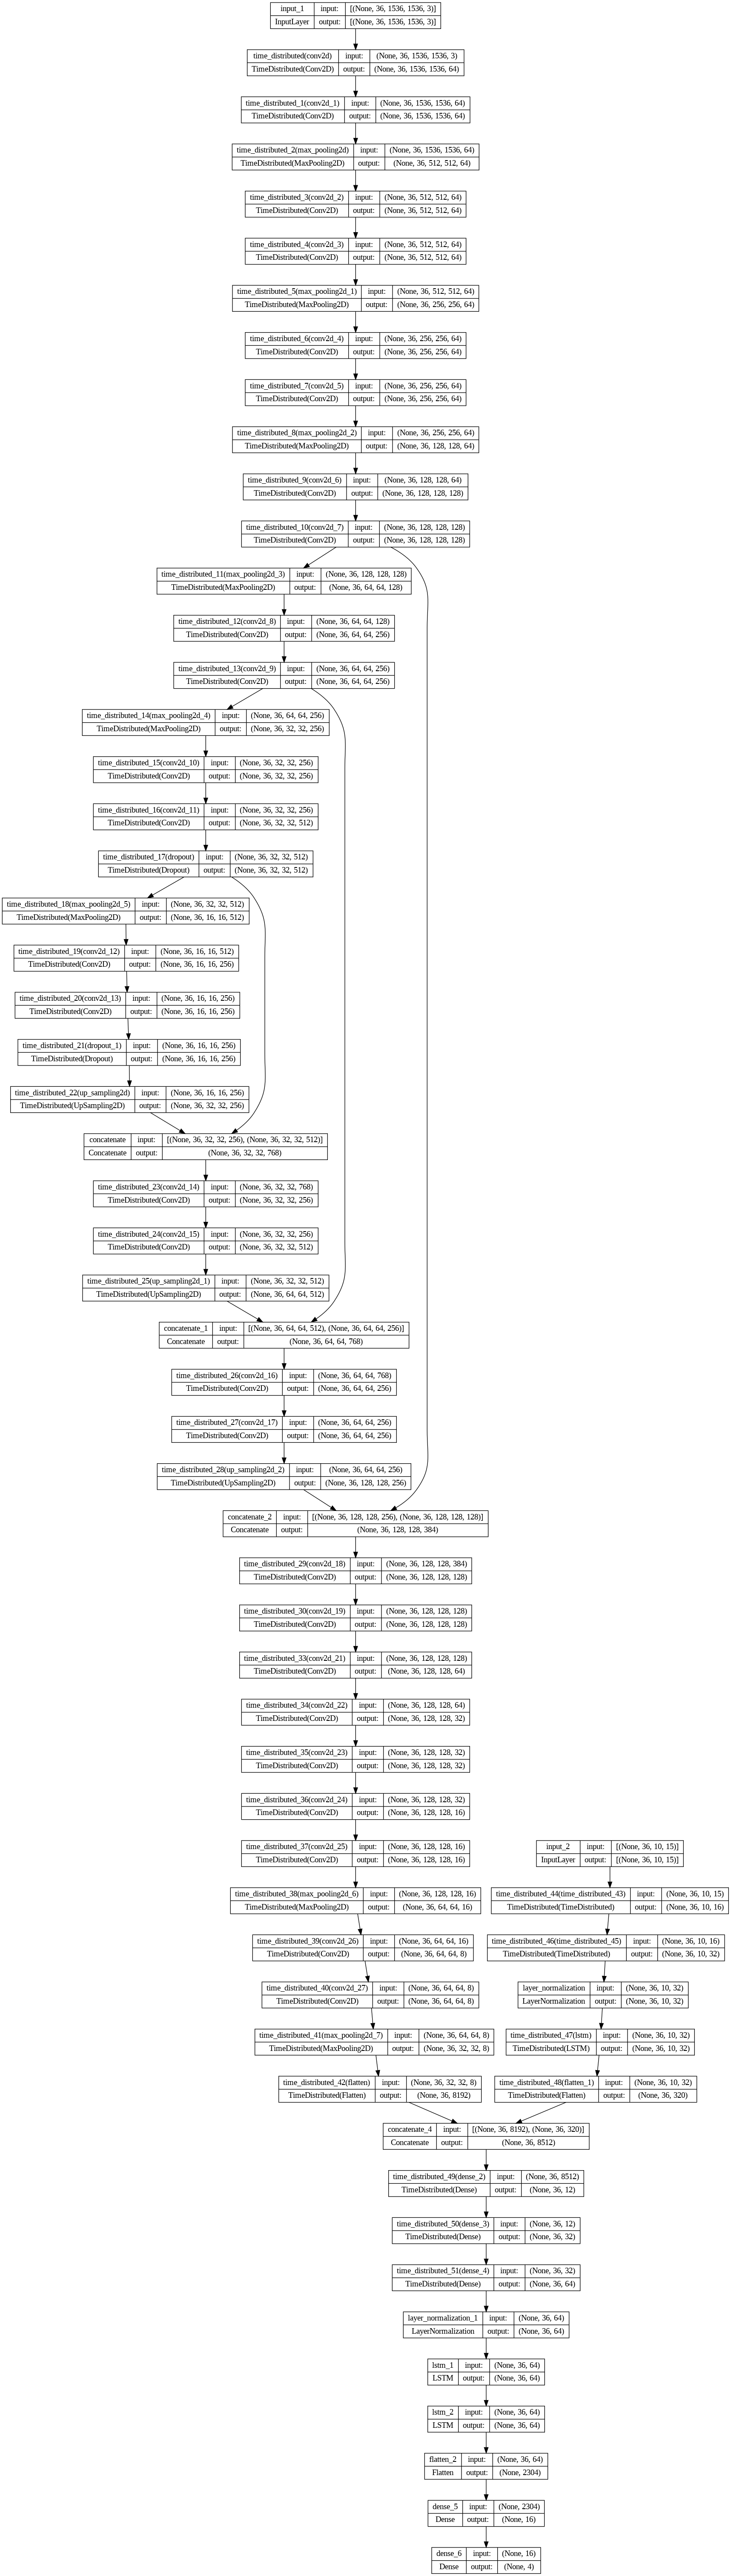

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="hi.png", show_shapes=True)


In [ ]:
type(train[0][0][0][0])

numpy.ndarray

In [ ]:
history=model.fit([k,i],list(train_output),epochs=10)

In [ ]:
def prediction(image_dir,weather_dir):

  arr=[]
  for i in scenario:
    arr.append(model.predict())
    DF = pd.DataFrame(arr)
    DF.to_csv("data1.csv")